# KNN - Aprendizado supervisionado - Classificacao

## 1.0 Import Libraries

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:.2f}'.format


### 1.1 Load DATASET

In [2]:
dataset_path = 'train.csv'

In [3]:
df = pd.read_csv(dataset_path)

In [4]:
df.head()

,id_cliente,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,dias_atraso_dt_venc,num_pgtos_atrasados,num_consultas_credito,taxa_juros,investe_exterior,pessoa_polit_exp,limite_adicional
0,1767,21,278.17,2577.05,24196.90,104.31,31.04,6,5,7,21,14,9,15,Não,Não,Negar
1,11920,40,268.87,2465.39,19227.38,69.86,36.92,5,8,5,40,23,10,18,Não,Não,Negar
2,8910,36,446.64,1055.29,42822.28,134.20,34.56,0,3,6,26,13,3,15,Sim,Não,Negar
3,4964,58,321.14,703.05,51786.83,297.35,31.49,0,3,7,12,7,2,1,Sim,Não,Negar
4,10100,35,428.72,891.29,44626.85,134.20,28.03,2,8,7,24,10,8,20,Sim,Não,Negar


## 2.0 Selecao de FEATURES

In [5]:
features = ['idade', 'saldo_atual', 'divida_atual', 'renda_anual',
       'valor_em_investimentos', 'taxa_utilizacao_credito', 'num_emprestimos',
       'num_contas_bancarias', 'num_cartoes_credito', 'dias_atraso_dt_venc',
       'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros']
label = 'limite_adicional'



## 3.0 Treinamento

In [6]:
#preparacao
x_train = df.loc[: , features]
y_train = df.loc[: , label]

#treinamento
k = 7
knn_classifier = KNeighborsClassifier ( n_neighbors= k)
knn_classifier.fit(x_train, y_train)

#previssao
y_pred = knn_classifier.predict(x_train)

#comparacao
df1 = df.loc[:, ['id_cliente','limite_adicional']]
df1['predicted'] = y_pred

In [7]:
df1.sample(10)

,id_cliente,limite_adicional,predicted
3930,12265,Negar,Negar
4492,11895,Negar,Negar
1430,8770,Negar,Negar
5798,8479,Negar,Negar
7961,6975,Negar,Negar
1489,8941,Negar,Negar
7749,8363,Conceder,Negar
2799,7406,Negar,Negar
9124,7548,Conceder,Conceder
2398,10600,Negar,Negar


## 4.0 Performance

### 4.1 Matriz de confusao

[[ 369 1136]
 [ 203 7792]]


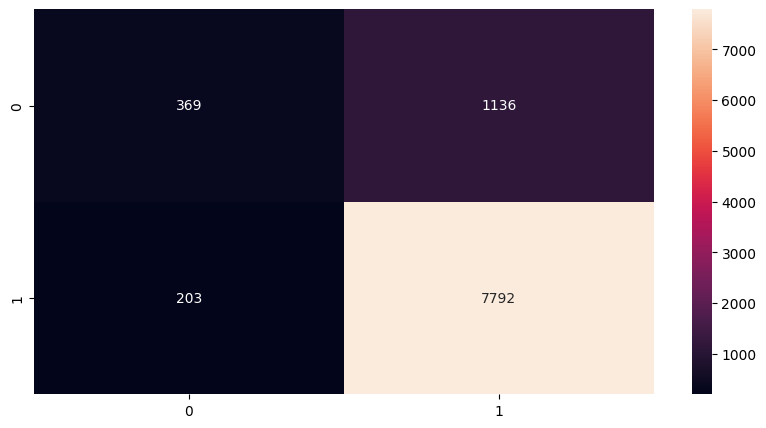

In [8]:
matriz_confusao = mt.confusion_matrix(y_train, y_pred)
print(matriz_confusao)
plt.figure(figsize=(10,5))
sns.heatmap(matriz_confusao, annot=True, fmt='.10g');


### 4.2 Acuracia

In [9]:
mt.accuracy_score(y_train.values,y_pred)

0.8590526315789474

### 4.3 Precision

In [10]:
mt.precision_score(y_train,y_pred, pos_label='Negar')

0.8727598566308243

### 4.4 Recall

In [11]:
mt.recall_score(y_train,y_pred, pos_label='Negar')

0.9746091307066916

### 4.5 Fine Tunning

In [12]:
neighbors = []
accuracy = []
precision = []
recall = []
N = [3,5,7,9,11,13,15,17,19,21,23,25,111]

for k in N:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train , y_train)

    #previssao
    y_pred = knn_classifier.predict(x_train)
    
    neighbors.append(k)
    accuracy.append(mt.accuracy_score(y_train.values,y_pred))
    precision.append(mt.precision_score(y_train,y_pred, pos_label='Negar'))
    recall.append(mt.recall_score(y_train,y_pred, pos_label='Negar'))
    
    
result_raw = {'neighbors': neighbors,
          'accuracy': accuracy,
          'precision': precision,
          'recall': recall }
result = pd.DataFrame.from_dict(result_raw)

In [13]:
result

,neighbors,accuracy,precision,recall
0,3,0.89,0.91,0.96
1,5,0.87,0.88,0.97
2,7,0.86,0.87,0.97
3,9,0.85,0.87,0.98
4,11,0.85,0.86,0.98
5,13,0.85,0.86,0.98
6,15,0.85,0.86,0.98
7,17,0.85,0.86,0.99
8,19,0.85,0.85,0.99
9,21,0.85,0.85,0.99
